In [33]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [34]:
df=pd.read_csv("C:/Users/Lenovo/data/Credit Risk/credit_risk_dataset.csv")

In [35]:
df.shape


(32581, 11)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_age                 32581 non-null  int64  
 1   person_income              32581 non-null  int64  
 2   person_home_ownership      32581 non-null  object 
 3   person_emp_length          31686 non-null  float64
 4   loan_intent                32581 non-null  object 
 5   loan_grade                 32581 non-null  object 
 6   loan_amnt                  32581 non-null  int64  
 7   loan_int_rate              29465 non-null  float64
 8   loan_status                32581 non-null  int64  
 9   loan_percent_income        32581 non-null  float64
 10  cb_person_default_on_file  32581 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 2.7+ MB


#  EDA & Data preprocessing

In [38]:
# missing values
miss_val=df.isnull().sum().values
u=pd.DataFrame({"Features":["person_age","person_income","person_home_ownership","person_emp_length",'loan_intent',"loan_grade","loan_amnt","loan_int_rate","loan_status","loan_percent_income","cb_person_default_on_file"],"Missing_value":miss_val})
u

,Features,Missing_value
0,person_age,0
1,person_income,0
2,person_home_ownership,0
3,person_emp_length,895
4,loan_intent,0
5,loan_grade,0
6,loan_amnt,0
7,loan_int_rate,3116
8,loan_status,0
9,loan_percent_income,0


In [39]:
#removing rows with missing values
df.dropna(inplace=True)

In [40]:
df.shape

(28638, 11)

In [41]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N


In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [42]:

fig = px.scatter_matrix(df, dimensions=
["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate"],labels={col:col.replace('_', ' ') for col in df.columns},height=900, color="loan_status", color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()
                        

In [43]:
#Removing outliers
df = df[df["person_age"]<=100]
df = df[df["person_emp_length"]<=100]
df = df[df["person_income"]<= 4000000]

<AxesSubplot:xlabel='loan_grade', ylabel='loan_percent_income'>

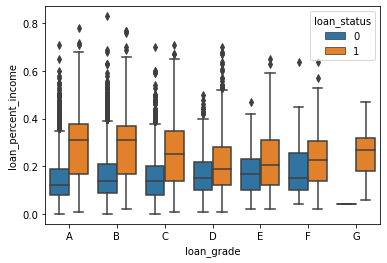

In [14]:
# box plot for loan percent income v/s loan grade 
sns.boxplot(x="loan_grade",y="loan_percent_income",hue="loan_status",order=["A","B","C","D","E","F","G"],data=df)


In [46]:
#One hot encoding of categorical variables
df = pd.get_dummies(data=df,columns=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'])

In [47]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,1,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [44]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
df.columns
X=df[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income']]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
print(X.columns)
X.values
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income'],
      dtype='object')
               feature        VIF
0           person_age  11.715928
1        person_income   4.693568
2    person_emp_length   2.542269
3            loan_amnt   8.353857
4        loan_int_rate   9.344364
5  loan_percent_income   8.039710


In [53]:
#Train and test split
from sklearn.model_selection import train_test_split  
Y = df['loan_status']
X = df.drop('loan_status',axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.20)
print(x_train)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)

       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
16819          22          48000                3.0      13000           7.88   
32395          51          46560                2.0      11600           8.94   
18100          31          85000                0.0      25000          11.89   
16131          22          29100                2.0       6250          16.07   
20660          31          30000                4.0       5000           9.91   
...           ...            ...                ...        ...            ...   
14928          23         120000                7.0      10000           9.91   
22333          29          54099                2.0      21000           9.96   
11227          22          52000                6.0      10000          11.71   
12298          25          31008                2.0      12000          13.79   
3146           22          36000                6.0      18500           7.90   

       loan_percent_income 

# Training Model

In [54]:
from sklearn.metrics import classification_report
def model_assess(model, name='Default'):
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    preds_proba = model.predict_proba(x_test)
    print('                   ', name, '\n',classification_report(y_test, model.predict(x_test)))
    
    
from sklearn.neighbors import KNeighborsClassifier
#KNN
knn = KNeighborsClassifier(n_neighbors=151,weights="uniform",metric="minkowski",p=2)
model_assess(knn, name='KNN')


                    KNN 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      4525
           1       0.82      0.42      0.56      1202

    accuracy                           0.86      5727
   macro avg       0.84      0.70      0.74      5727
weighted avg       0.85      0.86      0.84      5727



In [61]:
from sklearn.model_selection import GridSearchCV
parameter=[{"n_neighbors":[10,50,100,125,151]}]
grid_search=GridSearchCV(estimator=knn,param_grid=parameter,scoring="recall",cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=151), n_jobs=-1,
             param_grid=[{'n_neighbors': [10, 50, 100, 125, 151]}],
             scoring='recall')

In [70]:
# Best parameter
grid_search.best_params_

{'n_neighbors': 10}

In [64]:
# Recall score on training data set 
grid_search.best_score_

0.5873999999999999

In [69]:
# Recall score on test data set
from sklearn.metrics import recall_score
y2pred=grid_search.predict(x_test)
recall_score(y_test,y2pred)

0.5898502495840267

# Logistic Regression

In [55]:

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
model_assess(lg, 'Logistic Regression')

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4525
           1       0.76      0.57      0.65      1202

    accuracy                           0.87      5727
   macro avg       0.83      0.76      0.78      5727
weighted avg       0.86      0.87      0.86      5727



In [80]:
# Recall score on training and test dataset
y2pred=lg.predict(x_train)
re_train=recall_score(y_train,y2pred)
print("Recall score on training dataset: {:.2f} ".format(re_train))
ypred=lg.predict(x_test)
re_test=recall_score(y_test,ypred)
print("Recall score on test dataset: {:.2f} ".format(re_test))

Recall score on training dataset: 0.57 
Recall score on test dataset: 0.57 


In [56]:
#XGB
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb,'XGBoost')

D:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                    XGBoost 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4525
           1       0.96      0.75      0.84      1202

    accuracy                           0.94      5727
   macro avg       0.95      0.87      0.90      5727
weighted avg       0.94      0.94      0.94      5727



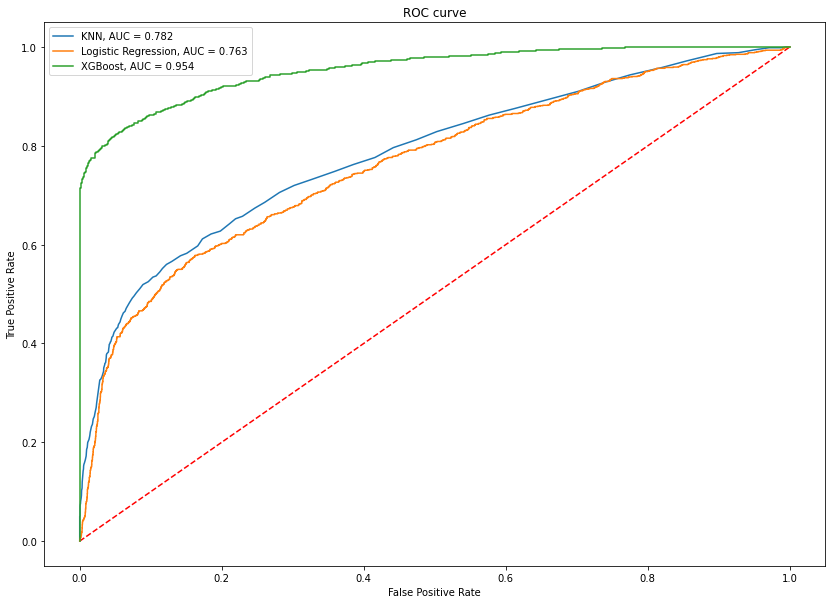

In [21]:
#ROC AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')


#KNN
preds_proba_knn = knn.predict_proba(x_test)
probsknn = preds_proba_knn[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(aucknn,3))}')



#Logistic Regression
preds_proba_lg = lg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')



#XGBoost
preds_proba_xgb = xgb.predict_proba(x_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')






plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

Text(0.5, 0, 'Gain')

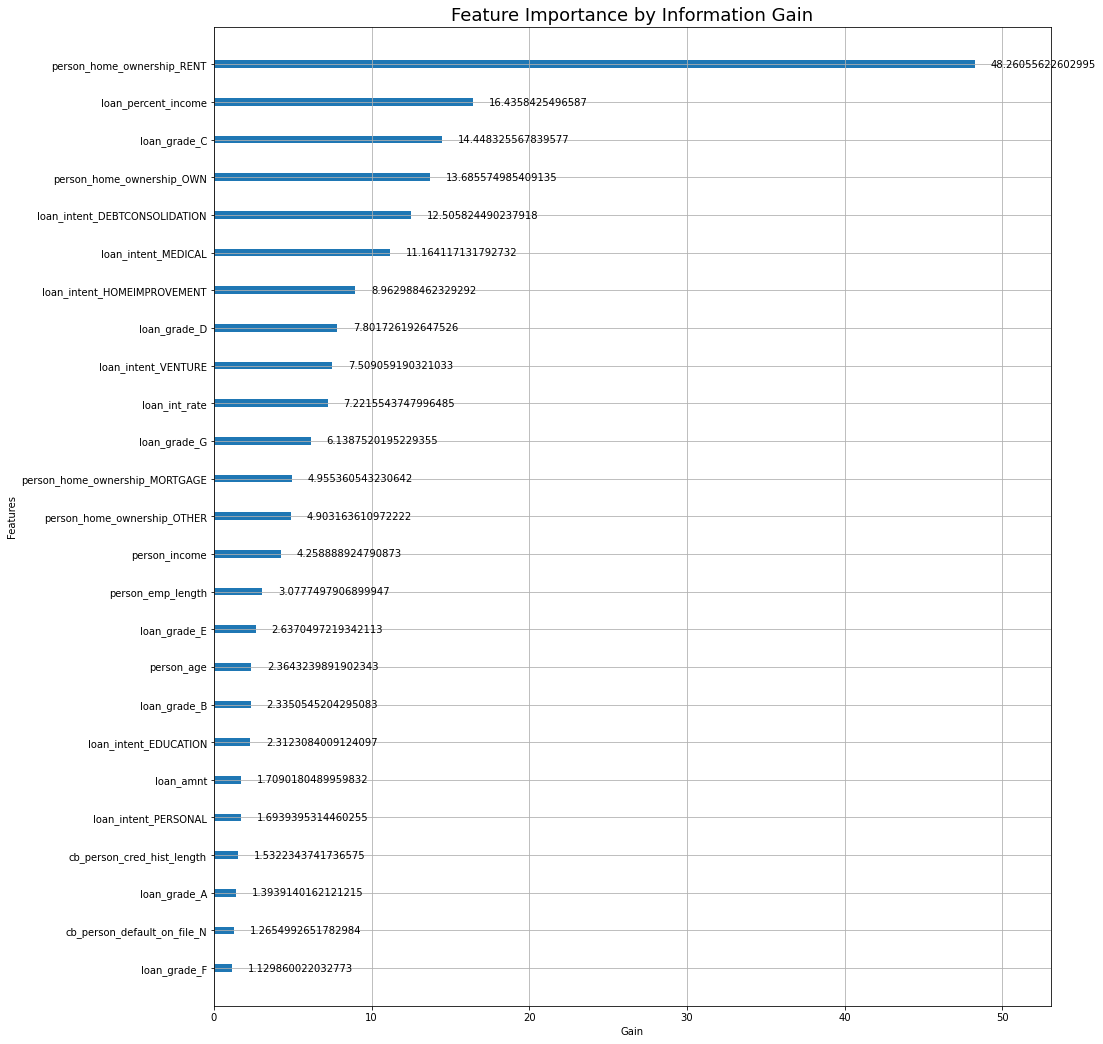

In [30]:
#Feature importance plot
from xgboost import plot_importance
fig, (ax1) = plt.subplots(figsize = (15, 17), ncols=1, nrows=1)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.5)
plot_importance(xgb, importance_type='gain', ax = ax1)
ax1.set_title('Feature Importance by Information Gain', fontsize = 18)
ax1.set_xlabel('Gain')